In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:11<00:00, 184MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.2MB/s]


In [ ]:
import zipfile# to unzip the file

# Specify the path to the zip file
zip_file_path = '/content/dogs-vs-cats.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files from the zip archive
    zip_ref.extractall()
    #import zipfile
    #zip_file_path=''
    #with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    #zip_ref.extractall()
    #
    #
    #

In [ ]:
import cv2
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,InputLayer,ImageDataGeneraor
from keras.applications.vgg16 import VGG16




In [ ]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.output_shape[1:]

(4, 4, 512)

In [ ]:
conv_base.trainable=False

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(150,150,3))) # Add an InputLayer to define the input shape
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Now this should work

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# use generator for loading data batch wise
# train_data=keras.utils.image_dataset_from_directory(
#     directory='/content/train',
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(150,150)
# )

# validation_data=keras.utils.image_dataset_from_directory(
#     directory='/content/test',
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(150,150)
# )


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_Size=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,

)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_Size,
    class_mode='binary'

)
validation_generator=validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_Size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# prompt:   labels='inferred',
#     label_mode='int',
#     batch_size=32, what is the meaning of label mode = int

# In the context of image classification using Keras,
# setting `label_mode='int'` in the `image_dataset_from_directory` function
# means that the labels for your images will be represented as integers.

# Here's a breakdown of how it works:

# 1. Directory Structure:
#    - Your images should be organized in folders, where each folder name
#      corresponds to a class label.
#      For example, you might have a folder named "cats" and another named "dogs".

# 2. Label Inference:
#    - When you set `labels='inferred'`, Keras automatically infers the class labels
#      from the folder names.

# 3. Integer Encoding:
#    - With `label_mode='int'`, Keras assigns a unique integer to each class.
#      For instance, "cats" might be assigned 0 and "dogs" might be assigned 1.

# 4. Model Output:
#    - Your model will then output predictions as integers, corresponding to these
#      encoded class labels.

# Other `label_mode` options include:

# - 'categorical': One-hot encoded labels (e.g., [1, 0] for "cats", [0, 1] for "dogs").
# - 'binary': Single value (0 or 1) for binary classification.
# - None: No labels are returned (useful for unsupervised learning).

# Choosing the right `label_mode` depends on your specific task and the type of
# model you're using. For typical multi-class classification problems, 'int' is a
# common and convenient choice.


In [ ]:
!pip install --upgrade tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
def process(image,label):
  image=tf.cast(image/150.,tf.float32)
  return image,label
train_data=train_data.map(process)
validation_data=validation_data.map(process)

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

AttributeError: 'Sequential' object has no attribute 'fit_generator'

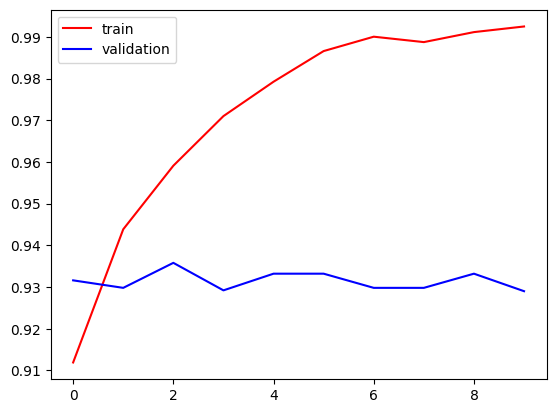

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

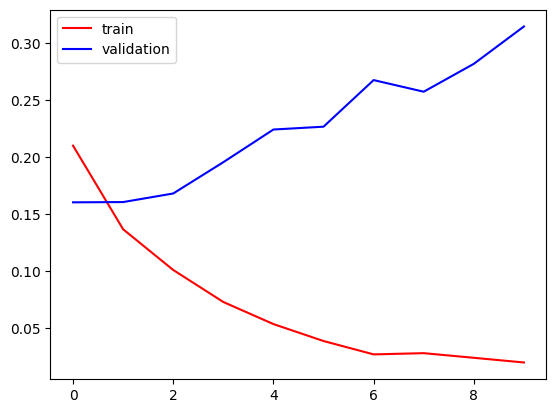

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,InputLayer
from keras.applications.vgg16 import VGG16

conv_base2=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

conv_base2.summary()
model2.add(InputLayer(input_shape=(150,150,3)))
model2.add(conv_base2)
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

conv_base2.trainable=False
